In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.gen_Distribution import *
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.To_Draw import *
from TO_sim.Multi_m import createFolder

In [8]:
t_end = 1000
m = 6
N = 2000
dist = "Quantile Lorentzian"
dK = 0.2
dt = 0.1
Ks, t_dic, rs_dic, t_r_dic, rs_r_dic = Hysteresis(m,N=N,dK=dK,t_end=t_end,dist=dist,dt=dt)

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

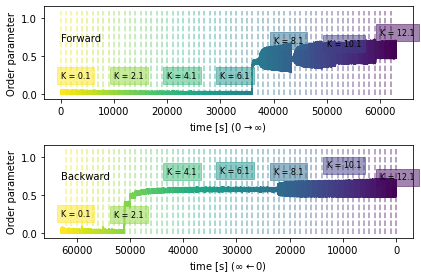

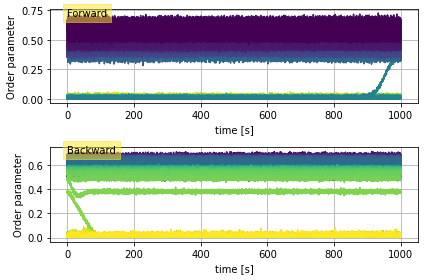

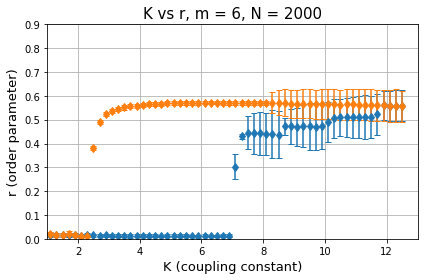

In [11]:
createFolder(f"Review3/m = {m}")
Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,save=True,Folder_name=f"Review3/m = {m}")
# Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,save=True,Folder_name="Review")

In [26]:
map(len,(p_theta,p_dtheta,p_omega))

In [ ]:
np.random.rand(10) == None

# Multiprocess

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

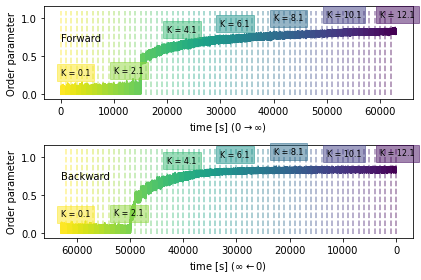

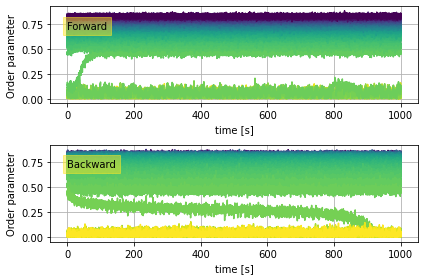

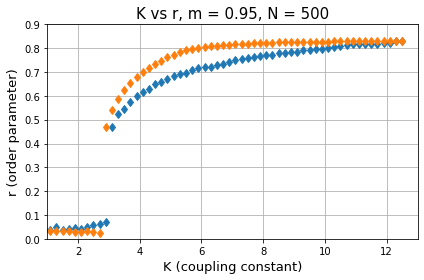

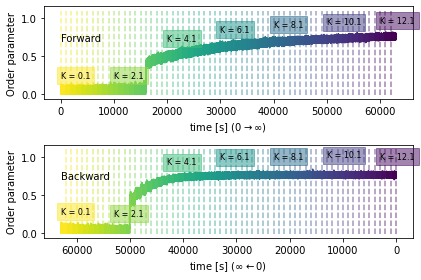

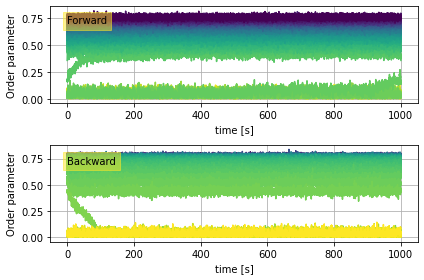

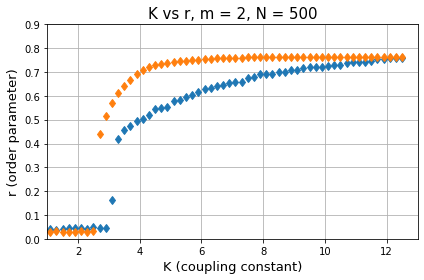

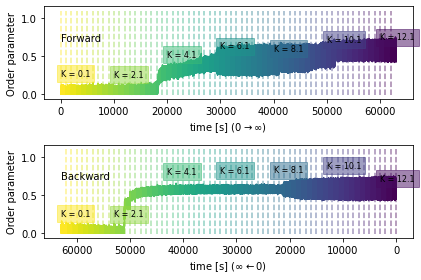

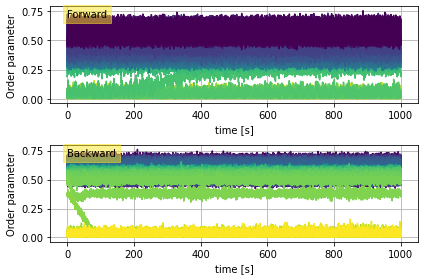

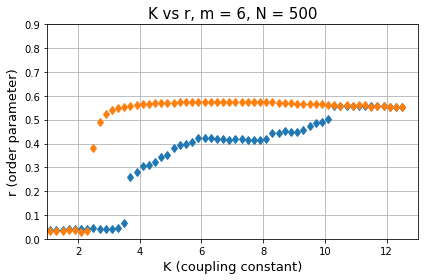

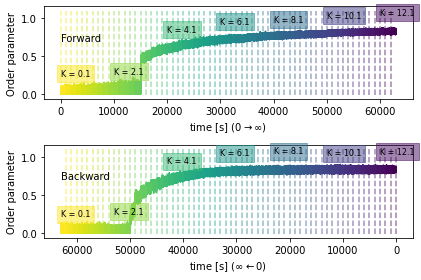

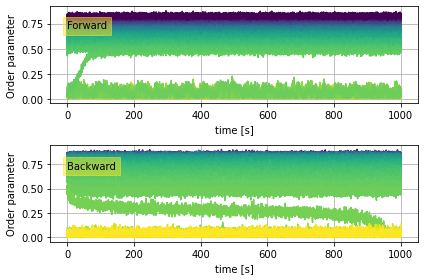

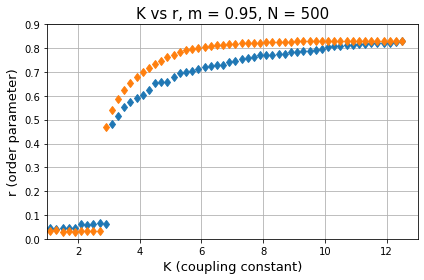

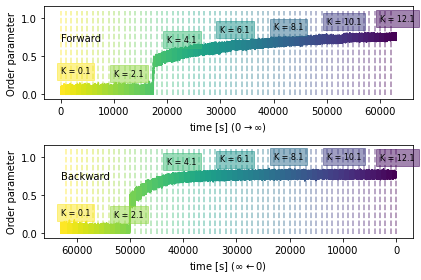

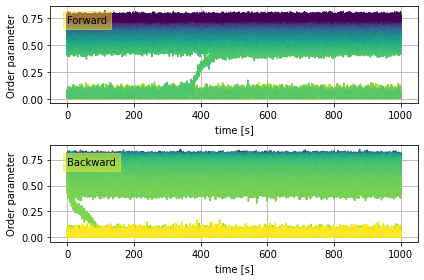

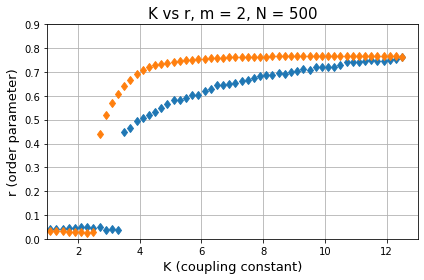

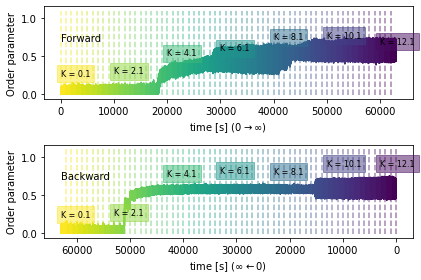

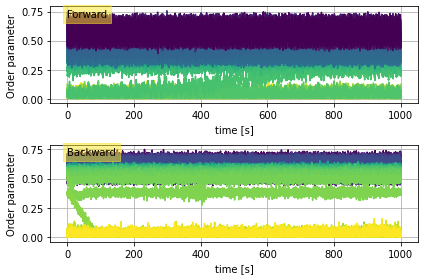

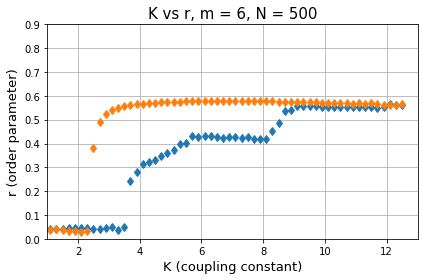

In [2]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise, Sim_Multi_mset_Noise,createFolder
import parmap
for Noise in [2e-2,3e-2]:
    Sim_Multi_mset_Noise(Noise)

# 231025

## RE Foward 4

In [3]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [4]:
df_read = pd.read_excel('Order parameter and secondary cluster2.xlsm',index_col=[0,1])
ms = df_read['r_mean_d'].unstack().columns
core = 14
index_ = 0
Ks = np.arange(0.1,10+0.05,0.1)
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 4
len(m_set)
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])

In [5]:
for m in tqdm(m_set[num][:]):
    # m = round(m,2)
    r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
    r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
    r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
    r_mus = df_read['r_main_u'].unstack()[m].to_numpy()
    r_sds,r_sus,r_su_ls,r_su_ds = rs_N_numpy(Ks,m,r_mus,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/14 [00:00<?, ?it/s]

In [6]:
df.sort_index().to_excel(f'231026 MULTI/{num} Order parameter and secondary cluster.xlsm')

# 새로운 알고리즘으로 시뮬레이션

In [1]:
import warnings
from tqdm.notebook import tqdm
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import pandas as pd
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.DataFrame(columns=['K','m','rM_u','rM_d',
                           'r0_u','r0_d','rd_u','rd_d',
                           'r+_ul','r+_drift','mu',
                           'r+_total_u','r+_total_d','r+_total_ul','r+_total_ud'])
df = df.set_index(['K','m'])

In [3]:
Ks = np.arange(0.0,15+0.05,0.1)
ms = np.arange(0.0,15+0.05,0.1)

In [4]:
core = 31
index_ = 0
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 4

In [5]:
for m in tqdm(m_set[num]):
    F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)
    r_du = lambda x: (F_R0u(x)-F_RMu(x))
    r_dd = lambda x: (F_R0d(x)-F_RMd(x))
    r_dp = lambda x: (F_R0u(x)-F_RMu(x))/2

    rs_d,rs_u,rs_dl,rs_ul,md,mu = OSP2.get_r_sec_np(Ks,m,F_RMu,samples=100)
    rs_uF = np.where(r_dp(Ks)<=rs_ul,rs_ul,np.nan)
    for i,K in enumerate(Ks):
        df.loc[(K,m),'rM_d'] = F_RMd(K)
        df.loc[(K,m),'rM_u'] = F_RMu(K)
        df.loc[(K,m),'r0_d'] = F_R0d(K)
        df.loc[(K,m),'r0_u'] = F_R0u(K)
        df.loc[(K,m),'rd_u'] = r_du(K)
        df.loc[(K,m),'rd_d'] = r_dd(K)
        df.loc[(K,m),'r+_ul'] = rs_uF[i]
        df.loc[(K,m),'r+_drift'] = r_dp(K)
        df.loc[(K,m),'mu'] = mu[i]
        df.loc[(K,m),'r+_total_d'] = rs_d[i]
        df.loc[(K,m),'r+_total_u'] = rs_u[i]
        df.loc[(K,m),'r+_total_d'] = rs_dl[i]
        df.loc[(K,m),'r+_total_u'] = rs_ul[i]

  0%|          | 0/27 [00:00<?, ?it/s]

In [6]:
df.sort_index().to_excel(f'231108 MULTI/{num} Order parameter and secondary cluster.xlsm')